In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/IRIS.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

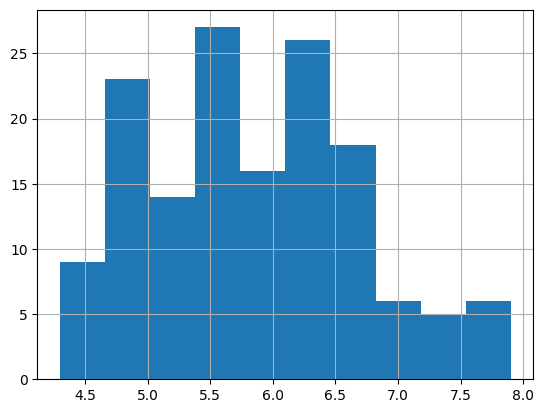

In [ ]:
df['sepal_length'].hist()

<Axes: >

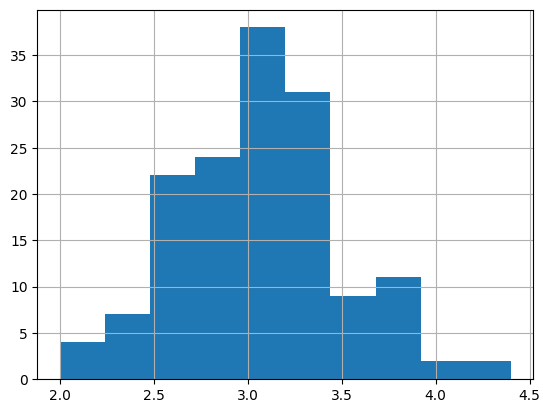

In [ ]:
df['sepal_width'].hist()

<Axes: >

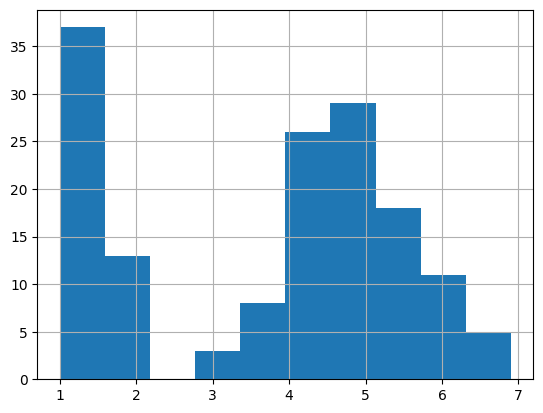

In [ ]:
df['petal_length'].hist()

<Axes: >

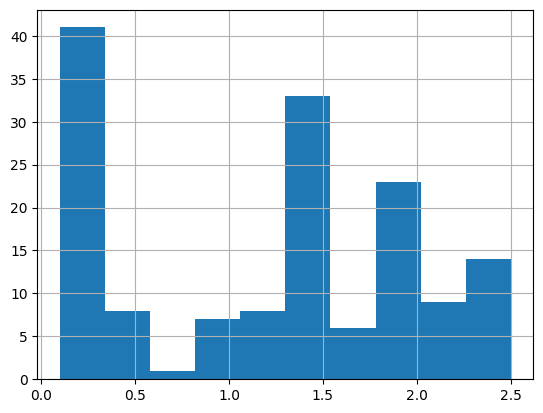

In [ ]:
df['petal_width'].hist()

<Axes: xlabel='sepal_length', ylabel='count'>

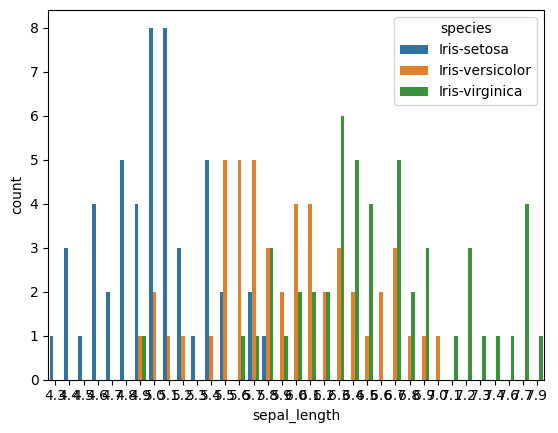

In [ ]:
sns.countplot(x=df['sepal_length'],hue=df['species'])

<Axes: xlabel='sepal_width', ylabel='count'>

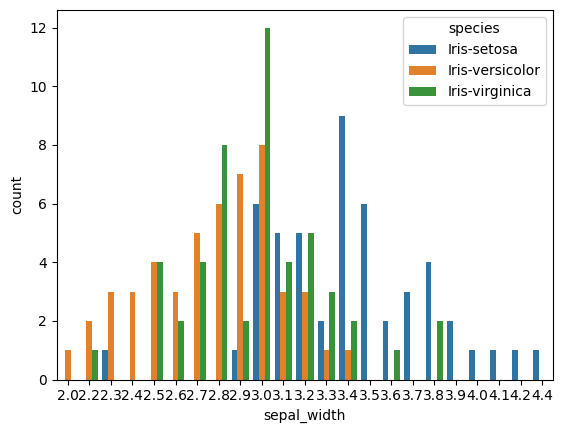

In [ ]:
sns.countplot(x=df['sepal_width'],hue=df['species'])

<Axes: xlabel='petal_length', ylabel='count'>

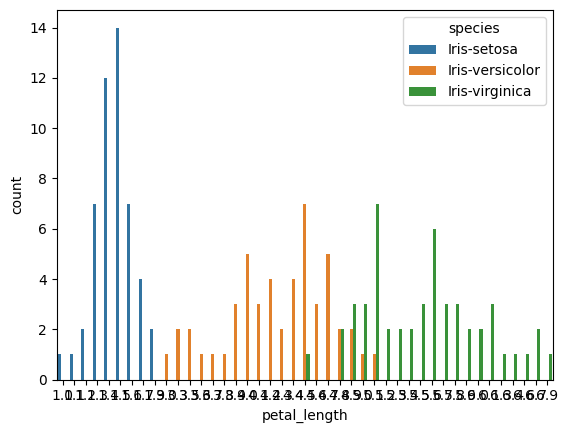

In [ ]:
sns.countplot(x=df['petal_length'],hue=df['species'])

<Axes: xlabel='petal_width', ylabel='count'>

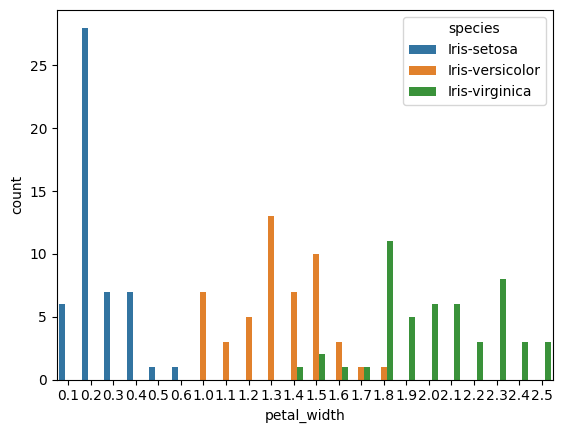

In [ ]:
sns.countplot(x=df['petal_width'],hue=df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

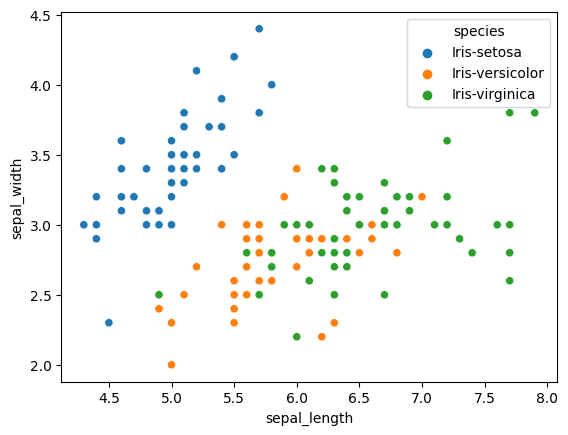

In [ ]:
sns.scatterplot(df,x="sepal_length",y="sepal_width",hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

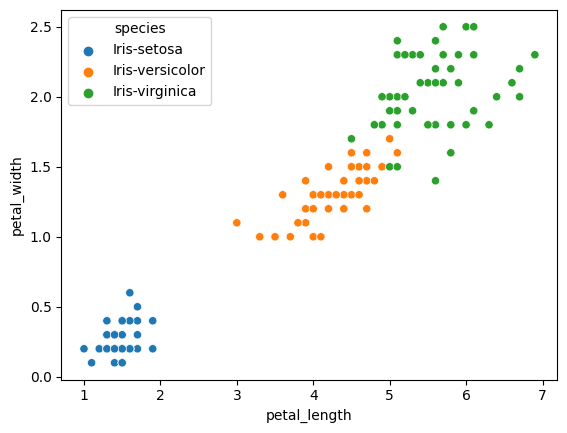

In [ ]:
sns.scatterplot(df,x="petal_length",y="petal_width",hue="species")

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
elbow = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['petal_length','petal_width']])
    elbow.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
elbow

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.48238901098901,
 13.933308757908755,
 11.105290437134375,
 9.261204827285605,
 7.732738763575604,
 6.55798446143229,
 5.712660942117462,
 5.253327847675673,
 4.780139176443523,
 4.295494806924156,
 4.031926925731272]

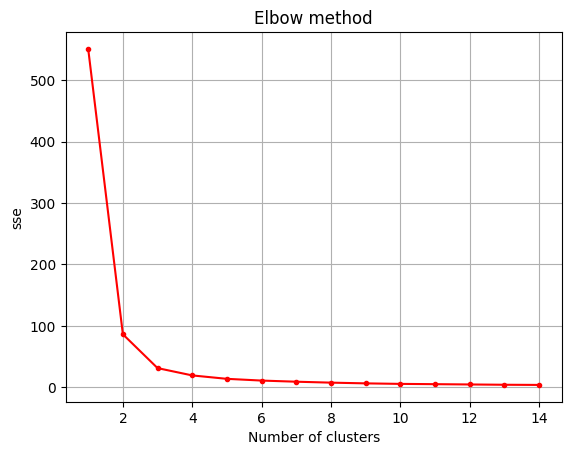

In [ ]:
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.plot(range(1,15), elbow,marker='.',color='red')
plt.grid()

In [ ]:
km=KMeans(n_clusters=3,n_init=15)

In [ ]:
labels=km.fit_predict(df[['petal_length','petal_width']])

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
km.cluster_centers_
cent=km.cluster_centers_
cent=np.array(cent)

In [65]:
import matplotlib.pyplot as plt

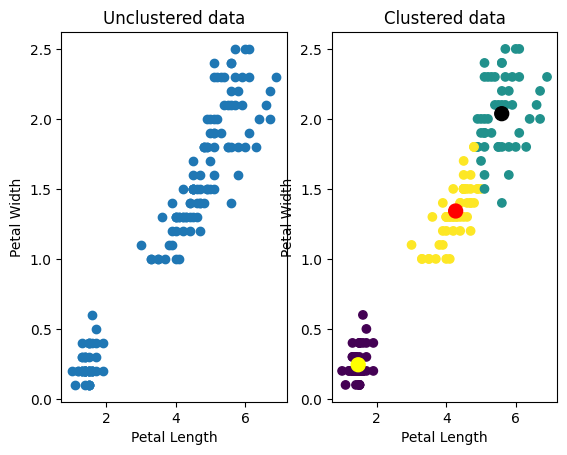

In [71]:
plt.subplot(1,2,1)
plt.title('Unclustered data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df['petal_length'],df['petal_width'])
plt.subplot(1,2,2)
plt.title('Clustered data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df['petal_length'],df['petal_width'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100, color=['yellow','black','red'])

In [73]:
from sklearn.metrics import confusion_matrix

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [81]:
df['species']=le.fit_transform(df['species'])

In [82]:
df['cluster']=labels
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [83]:
cfd = confusion_matrix(df.species,df.cluster)
cfd

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

In [84]:
true=df.species
pred=df.cluster

In [85]:
cfd=confusion_matrix(true,pred)
new_labels= ['sestosa','versicolor','virginica']

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay

([<matplotlib.axis.YTick at 0x7b9efc44e350>,
 [Text(0, 0, 'sestosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')])

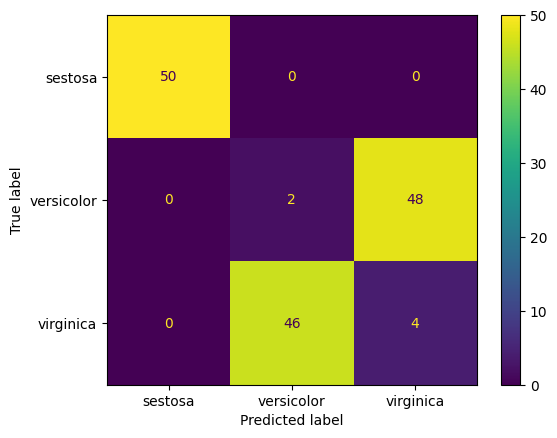

In [91]:
ConfusionMatrixDisplay.from_predictions(true,pred)
tick_marks=np.arange(len(new_labels))
plt.xticks(tick_marks,new_labels)
plt.yticks(tick_marks,new_labels)
